<a href="https://colab.research.google.com/github/YKochura/cv-kpi/blob/main/tutor/cnn/convolutional_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Author: Gene Kogan  et al.



### Convolutional networks

This is an annotated version of PyTorch's [example MNIST CNN code](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) for how to implement convolutional networks.

The CIFAR-10 classification task is a classic machine learning benchmark. The data includes 50,000 images belonging to 10 classes, and the task is to identify them. Along with MNIST, CIFAR-10 classification is a sort of like a "hello world" for computer vision and convolutional networks, so a solution can be implemented quickly with an off-the-shelf machine learning library.

Since convolutional neural networks have thus far proven to be the best at computer vision tasks, we'll use the PyTorch library to implement a convolutional networks as our solution.

Note, if you have been running these notebooks on a regular laptop without GPU until now, it's going to become more and more difficult to do so. The neural networks we will be training, starting with convolutional networks, will become increasingly memory and processing-intensive and may slow down laptops without good graphics processing. As such, it is recommended that you follow future tutorials inside Google Collab or a sufficiently powerful computer. 

Collab does not automatically include a GPU in it's runtime. Rather by navigating to Edit>Notebook Settings>Hardware Accelerator>GPU you can enable a gpu.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Recall that a basic neural network in PyTorch can be set up like this:
Note:
The images in CIFAR-10 are 32 by 32. An easy way to troubleshoot the correct input dimension is to encounter a dimension mismatch error. For example, [2x35] x [1024x4] doesn't work, but [2x1024] x [1924x4] does. This is usually as simple as matching the second matrix's first number with the first matrix's second number.

In [2]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32, 64) 
        self.fc2 = nn.Linear(64, 1)
    def forward(self, x):
         x = F.sigmoid(self.fc1(x))
         x = self.fc2(x)
         return x

net = Net().to(device)

We load CIFAR-10 dataset and reshape them as individual vectors. This is easy to do using TorchVision as all the classes are essentially reshapen already. Here we use the DataLoader to create an instance of the training dataset and the test set. The DataLoader also has an option to shuffle the dataset, which helps avoid overfitting.

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=8)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=8)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Files already downloaded and verified


Let's see some of our samples.

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


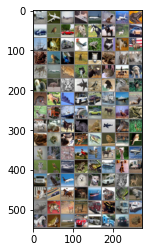

In [4]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


We can compile the model using categorical-cross-entropy loss, and train it for 30 epochs.

In [5]:
from torch import optim
optimizer = optim.SGD(net.parameters(), lr=0.01)
criterion = nn.MSELoss()

def fullPass(loader):

    running_loss = 0.0
    for i, data in enumerate(loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss
        if i % inputs.size()[0] == inputs.size()[0]-1:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / inputs.size()[0]))
            running_loss = 0.0

net.train()
for epoch in range(30):
    fullPass(trainloader);


print('Finished Training')


plane plane plane plane


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 3, 32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(inpu

[1,   128] loss: 13.524
[1,   256] loss: 10.790
[1,   384] loss: 10.483


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([80])) that is different to the input size (torch.Size([80, 3, 32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[2,   128] loss: 10.628
[2,   256] loss: 10.361
[2,   384] loss: 10.273
[3,   128] loss: 10.606
[3,   256] loss: 11.188
[3,   384] loss: 12.252
[4,   128] loss: 13.003
[4,   256] loss: 12.588
[4,   384] loss: 13.443
[5,   128] loss: 13.835
[5,   256] loss: 14.660
[5,   384] loss: 15.637
[6,   128] loss: 15.267
[6,   256] loss: 15.580
[6,   384] loss: 15.949
[7,   128] loss: 16.194
[7,   256] loss: 18.671
[7,   384] loss: 19.083
[8,   128] loss: 18.500
[8,   256] loss: 19.334
[8,   384] loss: 21.862
[9,   128] loss: 22.224
[9,   256] loss: 20.968
[9,   384] loss: 20.366
[10,   128] loss: 22.050
[10,   256] loss: 20.274
[10,   384] loss: 20.661
[11,   128] loss: 21.631
[11,   256] loss: 22.073
[11,   384] loss: 21.459
[12,   128] loss: 23.883
[12,   256] loss: 26.323
[12,   384] loss: 25.926
[13,   128] loss: 26.254
[13,   256] loss: 24.871
[13,   384] loss: 26.769
[14,   128] loss: 24.963
[14,   256] loss: 25.096
[14,   384] loss: 24.904
[15,   128] loss: 26.244
[15,   256] loss: 29.129

At this point, there is practically no need to evaluate the model as our neural net is simply not cutting it. With a loss function in the millions, we cannot use a single layer simple neural network on images.

Introducing, the convolutional network... The general architecture of a convolutional neural network is this:

- convolution layers, followed by pooling layers
- fully-connected layers
- a final fully-connected softmax layer

We'll follow this same basic structure and interweave some other components, such as [dropout](https://en.wikipedia.org/wiki/Dropout_(neural_networks), to improve performance.

To begin, we start with our convolution layers. We first need to specify some architectural hyperparemeters:

- _How many filters do we want for our convolution layers?_ Like most hyperparameters, this is chosen through a mix of intuition and tuning. A rough rule of thumb is: the more complex the task, the more filters. (Note that we don't need to have the same number of filters for each convolution layer, but we are doing so here for convenience.)
- _What size should our convolution filters be?_ We don't want filters to be too large or the resulting matrix might not be very meaningful. For instance, a useless filter size in this task would be a 28x28 filter since it covers the whole image. We also don't want filters to be too small for a similar reason, e.g. a 1x1 filter just returns each pixel.
- _What size should our pooling window be?_ Again, we don't want pooling windows to be too large or we'll be throwing away information. However, for larger images, a larger pooling window might be appropriate (same goes for convolution filters).

We start by designing a neural network with two alternating convolutional and max-pooling layers, followed by a 100-neuron fully-connected layer and a 10-neuron output. We'll have 64 and 32 filters in the two convolutional layers, and make the input shape a full-sized image (32x32x3) instead of an unrolled vector (3072x1).  We also now use ReLU activation units instead of sigmoids, to avoid vanishing gradients.

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net().to(device)
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Let's compile the model and test it again.

In [7]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(30):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 128 == 127:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 128))
            running_loss = 0.0

print('Finished Training')


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[1,   128] loss: 2.304
[1,   256] loss: 2.304
[1,   384] loss: 2.302
[2,   128] loss: 2.302
[2,   256] loss: 2.301
[2,   384] loss: 2.299
[3,   128] loss: 2.296
[3,   256] loss: 2.291
[3,   384] loss: 2.283
[4,   128] loss: 2.264
[4,   256] loss: 2.230
[4,   384] loss: 2.179
[5,   128] loss: 2.085
[5,   256] loss: 2.022
[5,   384] loss: 1.976
[6,   128] loss: 1.934
[6,   256] loss: 1.911
[6,   384] loss: 1.879
[7,   128] loss: 1.845
[7,   256] loss: 1.830
[7,   384] loss: 1.791
[8,   128] loss: 1.766
[8,   256] loss: 1.742
[8,   384] loss: 1.718
[9,   128] loss: 1.701
[9,   256] loss: 1.660
[9,   384] loss: 1.646
[10,   128] loss: 1.625
[10,   256] loss: 1.607
[10,   384] loss: 1.583
[11,   128] loss: 1.563
[11,   256] loss: 1.544
[11,   384] loss: 1.521
[12,   128] loss: 1.512
[12,   256] loss: 1.492
[12,   384] loss: 1.500
[13,   128] loss: 1.478
[13,   256] loss: 1.452
[13,   384] loss: 1.451
[14,   128] loss: 1.439
[14,   256] loss: 1.426
[14,   384] loss: 1.427
[15,   128] loss: 1

Let's evaluate the model again.

In [8]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Accuracy of the network on the 10000 test images: 57 %


58% accuracy is a big improvement on practically nothing! All of that is accomplished in just 2 epochs using convolutional layers and ReLUs. 

Let's try to make the network bigger.

One problem you might notice is that the accuracy of the model is much better on the training set than on the test set. You can see that by monitoring the progress at the end of each epoch above or by evaluating it directly.

This is a symptom of "overfitting".  Our model has probably tried to bend itself a little too well towards predicting the training set but does not generalize very well to unseen data. This is a very common problem. 

It's normal for the training accuracy to be better than the testng accuracy to some degree, because it's hard to avoid for the network to be better at predicting the data it sees. But a 9% difference is too much.

One way of helping this is by doing some regularization. We can add dropout to our model after a few layers.

All this is arguably most essential, albeit timeconsuming, part of designing a neural network: Editting hyperparamenters.

We compile and train again.

Training accuracy will likely lower but our test accuracy will increase.  This is more like what we expect.

Another way of improving performance is to experiment with different optimizers beyond just standard sgd. Let's try to instantiate the same network but use ADAM instead of sgd.

In [9]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 128 == 127:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 128))
            running_loss = 0.0

print('Finished Training')

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[1,   128] loss: 1.203
[1,   256] loss: 1.170
[1,   384] loss: 1.172
[2,   128] loss: 1.144
[2,   256] loss: 1.114
[2,   384] loss: 1.122
[3,   128] loss: 1.065
[3,   256] loss: 1.082
[3,   384] loss: 1.064
[4,   128] loss: 1.024
[4,   256] loss: 1.017
[4,   384] loss: 1.020
[5,   128] loss: 0.977
[5,   256] loss: 0.994
[5,   384] loss: 0.979
Finished Training


In [10]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Accuracy of the network on the 10000 test images: 62 %


61% accuracy! Our best yet. Looks heavily overfit though...

Still a long way to go to beat the [record](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130) (96%).  We can make a lot of progress by making the network (much) bigger, training for (much) longer and using a lot of little tricks (like data augmentation) but that is beyond the scope of this lesson for now.

Let's also recall how to predict a single value and look at its probabilities.

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


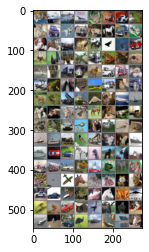

GroundTruth:    cat  ship  ship plane
Predicted:  horse   cat  ship  ship


In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Let's also review here how to save and load trained PyTorch models. It's easy!

In [12]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

torch.load(PATH)

OrderedDict([('conv1.weight',
              tensor([[[[ 5.7786e-02,  2.7208e-03,  7.1016e-02, -1.3763e-01, -1.2861e-01],
                        [-7.3279e-03, -8.9393e-02,  6.2339e-03, -1.5290e-01, -7.1966e-02],
                        [-2.8035e-01, -3.1424e-01, -3.7203e-01, -1.4509e-01, -1.3252e-01],
                        [-1.1277e-01, -2.2712e-01, -3.2403e-01, -2.2335e-01, -1.2303e-01],
                        [-4.2872e-02, -2.2523e-01, -8.2864e-02, -8.3447e-02,  3.6258e-04]],
              
                       [[ 1.8779e-03,  7.7599e-02,  1.1875e-01,  1.2626e-01, -4.5171e-02],
                        [ 4.2932e-02,  1.8935e-01,  8.8142e-02,  8.6859e-02,  6.6083e-02],
                        [-8.4152e-02, -1.5009e-01,  6.1255e-02,  1.1986e-02,  4.8297e-02],
                        [-7.2996e-02,  1.5498e-02,  2.7625e-02,  1.0739e-01,  3.7113e-02],
                        [-1.1562e-01, -7.6466e-02, -9.8155e-02, -9.7274e-03,  8.8721e-02]],
              
                       [[ 1.